#Project 3: Predicting Smoker Status

Eve Dean

##Notebook Outline:
The purpose of this notebook is to combine our models into a single notebook to be used for ensembling. We will use ensembling to choose the most accurate prediction from all the models. Models included in ensembling are logistic regression, Nearest Neighbors, and Decision Trees. 

#Import packages & load data 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, r2_score, mean_squared_error, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

In [ ]:
drive_dir = '/content/drive/MyDrive/Colab Notebooks/Project 3/data/'

In [ ]:
df = pd.read_csv(drive_dir + 'cleaned_data.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,AST,ALT,ggt,dental caries,tartar,smoking,bmi,upcratio,LDLratio,HDLratio
0,0,0,40,155,60,81.3,1.2,1.0,1,1,...,18,19,27,0,1,0,0.002497,1.428571,0.586047,0.339535
1,1,0,40,160,60,81.0,0.8,0.6,1,1,...,22,19,18,0,1,0,0.002344,1.666667,0.661458,0.218750
2,2,1,55,170,60,80.0,0.8,0.8,1,1,...,21,16,22,0,0,1,0.002076,1.000000,0.623967,0.227273
3,3,1,40,165,70,88.0,1.5,1.5,1,1,...,19,26,18,0,1,0,0.002571,1.000000,0.701863,0.139752
4,4,0,40,155,60,86.0,1.0,1.0,1,1,...,16,14,22,0,0,0,0.002497,1.666667,0.581522,0.336957


#Train test split & Balancing 

In [ ]:
#make separate dfs with only smokers and only nonsmokers
df_smokers = df[df['smoking'] == 1]
df_nonsmokers = df[df['smoking'] == 0]
X_smokers = df_smokers.drop(['smoking', 'ID'], axis=1)
y_smokers = df_smokers['smoking']
X_nonsmokers = df_nonsmokers.drop(['smoking', 'ID'], axis=1)
y_nonsmokers = df_nonsmokers['smoking']

In [ ]:
#split these dfs 70/30, then combine to get 50-50 balanced training and testing sets
X_train_smokers, X_test_smokers, y_train_smokers, y_test_smokers = train_test_split(X_smokers, y_smokers, train_size = 0.7)
num_rows_to_use = len(X_train_smokers)

X_train_nonsmokers, X_test_nonsmokers, y_train_nonsmokers, y_test_nonsmokers = train_test_split(X_nonsmokers, 
                                                                                    y_nonsmokers, train_size = num_rows_to_use)
X_train = pd.concat([X_train_smokers, X_train_nonsmokers])
y_train = pd.concat([y_train_smokers, y_train_nonsmokers])
X_test = pd.concat([X_test_smokers, X_test_nonsmokers])
y_test = pd.concat([y_test_smokers, y_test_nonsmokers])

#Models
All models were build and fine tuned using hyperparemeter testing or grid search in other notebooks. Models are combined into a voting classifier.

In [ ]:
#setting graph aesthetics
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

#Set font sizes individually. For example, you may want the title
#to be very big, but the axes labels to be only medium size.
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

##Logistic Regression

In [ ]:
logr = LogisticRegression() #instantiate logr 
logr.fit(X_train, y_train) #fit the model
logr_preds2 = logr.predict(X_test) #make predictions

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-0.692318462025945
0.2967918391484329
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     20919
           1       0.41      0.75      0.53      6137

    accuracy                           0.70     27056
   macro avg       0.66      0.72      0.66     27056
weighted avg       0.79      0.70      0.73     27056



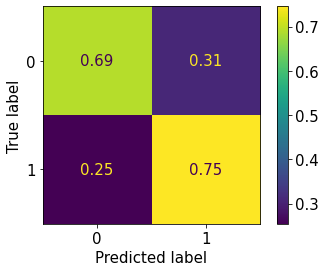

In [ ]:
#assess model effectiveness 
r2s = r2_score
print(r2s(y_test,logr_preds2))
mse = mean_squared_error(logr_preds2,y_test)
print(mse)
print(classification_report(y_test, logr_preds2))
ConfusionMatrixDisplay.from_predictions(y_test, logr_preds2, normalize='true')
plt.show()

###Assessing Factor Importance

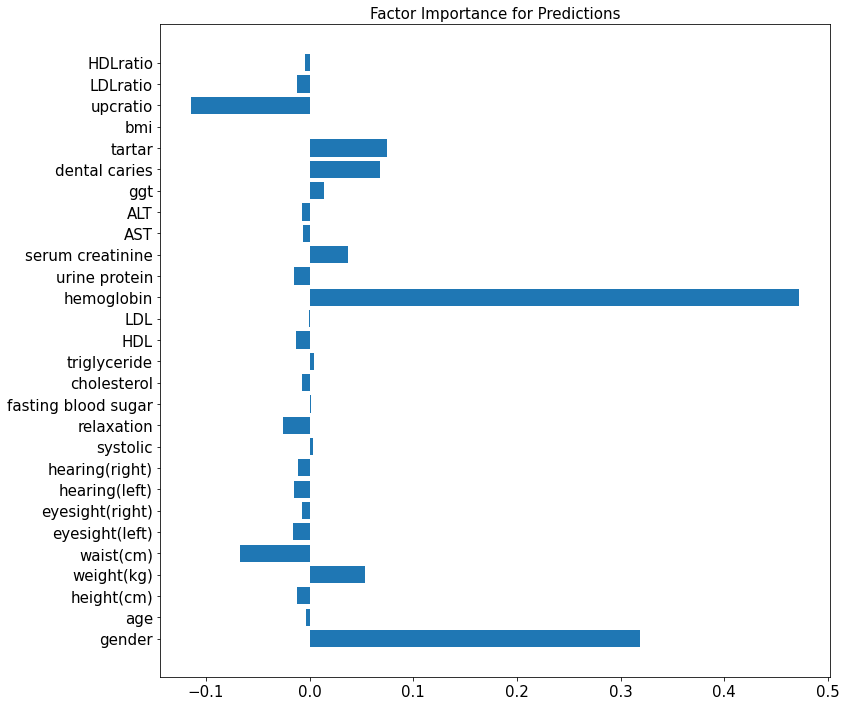

In [ ]:
#make figure showing factor importance based on logr model
plt.figure(figsize=(12, 12))
plt.barh(y=X_train.columns, width=logr.coef_[0]) # The zero is needed because the coefficients are an array of arrays.
plt.title('Factor Importance for Predictions'); 

In [ ]:
logr.coef_ #look at coefficients 

array([[ 3.19044474e-01, -3.34930765e-03, -1.19572427e-02,
         5.38726213e-02, -6.71963829e-02, -1.59628985e-02,
        -7.57732548e-03, -1.50117663e-02, -1.10689039e-02,
         2.95590674e-03, -2.59516228e-02,  9.78535676e-04,
        -7.50105816e-03,  4.36544149e-03, -1.28353322e-02,
        -5.80847824e-04,  4.72393829e-01, -1.54081991e-02,
         3.72938952e-02, -6.72250464e-03, -7.23322377e-03,
         1.39788591e-02,  6.77284232e-02,  7.43782037e-02,
        -8.09449509e-05, -1.14875607e-01, -1.22373884e-02,
        -4.79431520e-03]])

In [ ]:
coef = logr.coef_[0]
variable_names = X_test.columns.tolist()

# create a dataframe with the coefficients and variable names
coef_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': coef})

# sort the dataframe by absolute coefficient value (descending order)
coef_df['Absolute Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False).reset_index(drop=True)

# print the dataframe
print(coef_df)
#This should output a table with two columns: "Variable" and "Coefficient", where "Variable" contains the names of the variables and "Coefficient" contains the corresponding coefficient values. The table is sorted in descending order of absolute coefficient values. You can modify the output format or sorting method as needed.


               Variable  Coefficient  Absolute Coefficient
0            hemoglobin     0.472394              0.472394
1                gender     0.319044              0.319044
2              upcratio    -0.114876              0.114876
3                tartar     0.074378              0.074378
4         dental caries     0.067728              0.067728
5             waist(cm)    -0.067196              0.067196
6            weight(kg)     0.053873              0.053873
7      serum creatinine     0.037294              0.037294
8            relaxation    -0.025952              0.025952
9        eyesight(left)    -0.015963              0.015963
10        urine protein    -0.015408              0.015408
11        hearing(left)    -0.015012              0.015012
12                  ggt     0.013979              0.013979
13                  HDL    -0.012835              0.012835
14             LDLratio    -0.012237              0.012237
15           height(cm)    -0.011957              0.0119

In [ ]:
coef_df.style.set_properties(**{'text-align': 'center', 'font-size': '12pt'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])])


,Variable,Coefficient
0,hemoglobin,0.472394
1,gender,0.319044
2,upcratio,-0.114876
3,tartar,0.074378
4,dental caries,0.067728
5,waist(cm),-0.067196
6,weight(kg),0.053873
7,serum creatinine,0.037294
8,relaxation,-0.025952
9,eyesight(left),-0.015963


<Axes: title={'center': 'Coefficients per Variable'}, ylabel='Variable'>

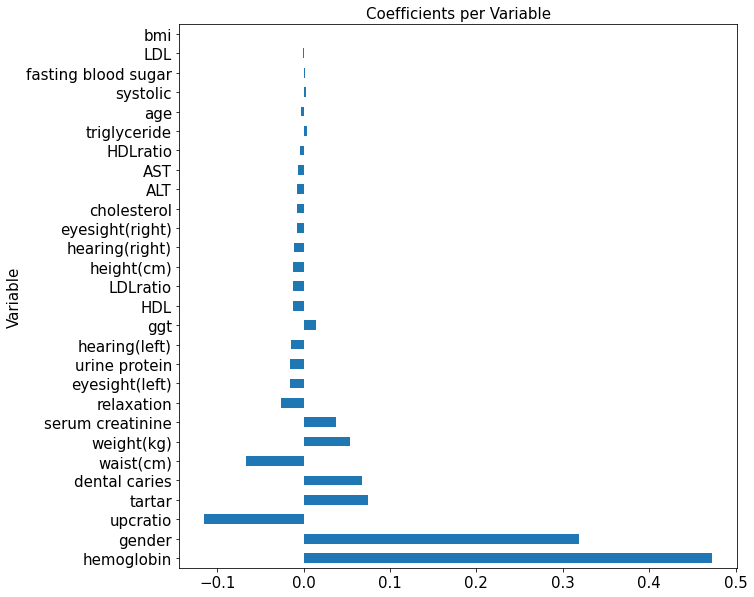

In [ ]:
top_coef = coef_df.sort_values('Absolute Coefficient', ascending=False)
top_coef.plot(kind = 'barh',
              x = 'Variable',
              y = 'Coefficient',
              figsize=(10,10),
              xlabel = 'Variable',
              title = 'Coefficients per Variable',
              legend = False)

<Axes: title={'center': 'Coefficients per Variable'}, ylabel='Variable'>

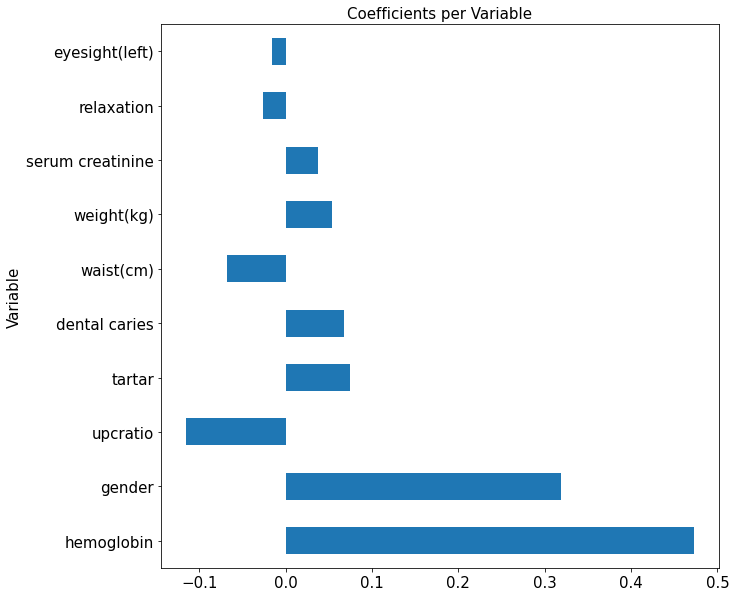

In [ ]:
top_coef = coef_df.sort_values('Absolute Coefficient', ascending=False)[:10]
top_coef.plot(kind = 'barh',
              x = 'Variable',
              y = 'Coefficient',
              figsize=(10,10),
              xlabel = 'Variable',
              title = 'Coefficients per Variable',
              legend = False)

##Nearest Neighbors

              precision    recall  f1-score   support

           0       0.91      0.65      0.75     20919
           1       0.39      0.77      0.52      6137

    accuracy                           0.68     27056
   macro avg       0.65      0.71      0.64     27056
weighted avg       0.79      0.68      0.70     27056



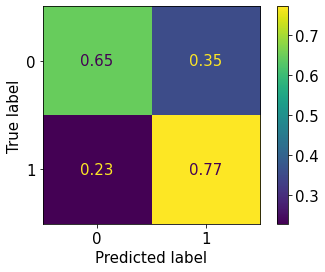

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors= 50) #instantiate model, n_neighbors = 50 based on hyperparameter tuning
knn_clf.fit(X_train, y_train) #fit the model
y_preds_split2 = knn_clf.predict(X_test) #make predictions
print(classification_report(y_test, y_preds_split2)) #assess model effectiveness
ConfusionMatrixDisplay.from_predictions(y_test, y_preds_split2, normalize='true') #confusion matrix
plt.show()

##Gradient Boosting Classifier 

0.7689976345357776


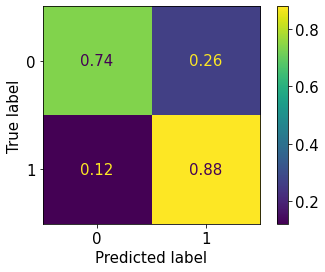

In [ ]:
gbc = GradientBoostingClassifier(n_estimators = 200, learning_rate= .075, max_depth = 10) #instantiate model, parameters based on grid search
gbc.fit(X_train, y_train) #fit model 
gbc_preds = gbc.predict(X_test) #make predictions
print(accuracy_score(y_test, gbc_preds)) #assess accuracy 
ConfusionMatrixDisplay.from_predictions(y_test, gbc_preds, normalize='true') #print confusion matrix
plt.show()

#Ensembling

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7447146658781786
0.7872417967164221


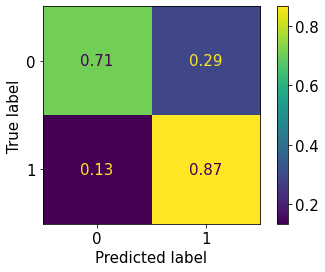

In [ ]:
#SOFT VOTING, instantiate voting clf, input models for voting
vote_clf = VotingClassifier([('logr', logr), ('knn_clf', knn_clf), ('gbc', gbc)], voting='soft')
vote_clf.fit(X_train, y_train) #fit model
ens_pred = vote_clf.predict(X_test) #make predictions
print(accuracy_score(y_test, ens_pred))
print(roc_auc_score(y_test, ens_pred))
ConfusionMatrixDisplay.from_predictions(y_test, ens_pred, normalize='true') #show confusion matrix
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7225753991720876
0.7583015544107399


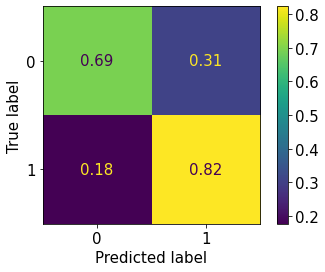

In [ ]:
#HARD VOTING, instantiate voting clf, input models for voting
vote_clf = VotingClassifier([('logr', logr), ('knn_clf', knn_clf), ('gbc', gbc)], voting='hard')
vote_clf.fit(X_train, y_train) #fit model
ens_pred = vote_clf.predict(X_test) #make predictions
print(accuracy_score(y_test, ens_pred))
print(roc_auc_score(y_test, ens_pred))
ConfusionMatrixDisplay.from_predictions(y_test, ens_pred, normalize='true') #show confusion matrix
plt.show()